In [0]:
#downloading dataset to colab
!wget -qq http://download.cs.stanford.edu/deep/MRNet-v1.0.zip -P ./data

In [0]:
#unziping
!unzip --qq data/MRNet-v1.0.zip -d ./data

warning [data/MRNet-v1.0.zip]:  4294967296 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  4294967296
  (attempting to re-compensate)
file #2547:  bad zipfile offset (local header sig):  1353202
  (attempting to re-compensate)


In [0]:
#!pip install -U pydicom

     |████████████████████████████████| 7.0MB 71kB/s 


In [0]:
import os
import numpy as np
from matplotlib import pyplot as plt
import math

In [0]:
#%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:


#reading axial directory in order
axial_dir = os.listdir("/content/data/MRNet-v1.0/train/axial/")
axial_dir = [f.lower() for f in axial_dir]   # Convert to lower case
a=sorted(axial_dir)
axial_list=np.array(a)
axial_reloaded=[]


print(axial_list.shape)

for j in range(1,1131):
    file= "/content/data/MRNet-v1.0/train/axial/"+axial_list[j]
    
    axial_reloaded.append(np.load(file,allow_pickle='false'))
    
#print(axial_reloaded[100].shape)
axial_reloaded=np.array(axial_reloaded)

print(axial_reloaded.shape)

s=axial_reloaded.shape
print(axial_reloaded[0].shape[0])
#print(s[1])

train_axial=[]


print(len(axial_reloaded))
#just potting the images 
for j in range(len(axial_reloaded)):
    mid=math.floor((axial_reloaded[j].shape[0])/2)
    train_axial.append([])
    
    #genereting training set for axial
    for n in range(mid-1,mid+2):
         train_axial[j].append(axial_reloaded[j][n])
train_axial=np.array(train_axial)

train_axial=np.reshape(train_axial,(1130,256,256,3))

print(train_axial.shape)



(1131,)
(1130,)
44
1130
(1130, 256, 256, 3)


In [0]:
import csv

with open("/content/data/MRNet-v1.0/train-abnormal.csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    line_count = 0
    trainAb_labels=[]
    for row in csv_reader:
           trainAb_labels.append(int(row[1]))
print(trainAb_labels)
trainAb_labels= np.array(trainAb_labels)
print(len(trainAb_labels))

with open("/content/data/MRNet-v1.0/train-acl.csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    line_count = 0
    trainACL_labels=[]
    for row in csv_reader:
           trainACL_labels.append(int(row[1]))
print(trainAb_labels)
trainACL_labels= np.array(trainACL_labels)
print(len(trainACL_labels))


with open("/content/data/MRNet-v1.0/train-meniscus.csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    line_count = 0
    trainMen_labels=[]
    for row in csv_reader:
           trainMen_labels.append(int(row[1]))
print(trainMen_labels)
trainAb_labels= np.array(trainMen_labels)
print(len(trainMen_labels))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Dropout
from keras import backend as K
from keras.layers import Input

# InceptionV3 Model for Axial Meniscus

In [0]:
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(256, 256,3))  # this assumes K.image_data_format() == 'channels_last'

base_model_ax_men = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)


In [0]:

x = base_model_ax_men.output

x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x=Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)
#base_model.output=x
# this is the model we will train
model = Model(inputs=base_model_ax_men.input,outputs=predictions)

In [0]:
for layer in model.layers[:79]:
   layer.trainable = False
for layer in model.layers[79:]:
   layer.trainable = True
    

In [0]:
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
early_stopping_monitor = EarlyStopping(patience=5)    
model.compile(optimizer=SGD(lr=0.001,momentum=0.9), loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_axial ,trainMen_labels, validation_split=0.05,shuffle=True ,epochs=100, callbacks=[early_stopping_monitor], batch_size = 20)
#model.fit(train_axial,trainMen_labels,epochs=50,batch_size=1000,validation_split=0.05,verbose=2,callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min")])

Train on 1073 samples, validate on 57 samples
Epoch 1/100
1073/1073 [==============================] - 54s 51ms/step - loss: 0.6644 - acc: 0.6328 - val_loss: 6.2210 - val_acc: 0.6140
Epoch 2/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.5230 - acc: 0.7316 - val_loss: 6.2210 - val_acc: 0.6140
Epoch 3/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.4364 - acc: 0.7819 - val_loss: 6.2210 - val_acc: 0.6140
Epoch 4/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.3232 - acc: 0.8677 - val_loss: 6.2210 - val_acc: 0.6140
Epoch 5/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.2072 - acc: 0.9366 - val_loss: 6.5301 - val_acc: 0.5614
Epoch 6/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.1149 - acc: 0.9674 - val_loss: 5.8830 - val_acc: 0.6316
Epoch 7/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.0675 - acc: 0.9851 - val_loss: 4.8252 - val_acc: 0.6667
E

 # De acc beta3et inception model
 #acc: 0.3495                             softmax
 #acc: 0.6841                             sigmoid
 #acc: 0.4567                             shelt el dense layer
  #acc: 0.6058                             raga3t el dens layer
 #0.64867256                             added dropout 0.1
  #acc: 0.5163                             dr=0.3
  #0.4                                             dr=0.2
 #val_acc: 0.4737                        dr=0.1
 #0.6336283184785758             zawdt el training layers
 #0.6460176990095493            lr=0.0001
 #0.46371681437028195         lr=0.01
 #0.6460176990095493            lr=0.00001
 #0.40973451330071003         shelt el momentum bada2 y habel
  
  
 # hagrab Nasnet
 very slow w accracy 0.3
 
 
 #Inception tany
 0.6486725662661865    lr 0.01
  0.5415929205649722    trainable 50
  0.414159292061772      trainable  70
  0.6274336282130891    zawdt dr layers

1130/1130 [==============================] - 4s 4ms/step
Train loss: 5.3126493344264745
Train accuracy: 0.6141592922463881


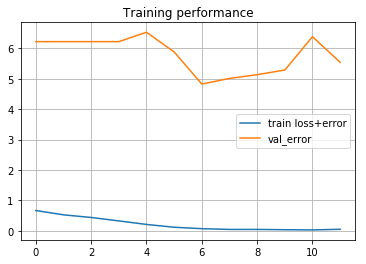

In [0]:
# Show simple version of performance                           
score = model.evaluate(train_axial ,trainMen_labels,verbose=1)       
print('Train loss:',score[0])
print('Train accuracy:',score[1])                          
# Show loss curves                                          
plt.figure()
plt.grid()                                              
                                                            
plt.title('Training performance')                          
plt.plot(history.epoch, history.history['loss'], label='train loss+error')  
plt.plot(history.epoch, history.history['val_loss'], label='val_error')   
plt.legend()

#To save the model

In [0]:
#from keras.models import load_model

#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
#identical to the previous one
#model = load_model('my_model.h5')

#Plotting accuracy of both training and validation sets per epoch.

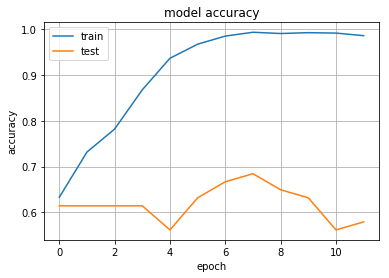

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid() 
plt.show()

#InceptionV3 Model for Axial ACL

In [0]:
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(256, 256,3))  # this assumes K.image_data_format() == 'channels_last'

base_model_ax_ACL = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)



In [0]:
x = base_model_ax_ACL.output

x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x=Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)
#base_model.output=x
# this is the model we will train
model2 = Model(inputs=base_model_ax_ACL.input,outputs=predictions)

In [0]:
for layer in model2.layers[:79]:
   layer.trainable = False
for layer in model2.layers[79:]:
   layer.trainable = True

In [0]:
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
early_stopping_monitor = EarlyStopping(patience=5)    
model2.compile(optimizer=SGD(lr=0.001,momentum=0.9), loss='binary_crossentropy',metrics=['accuracy'])
history2=model2.fit(train_axial ,trainACL_labels, validation_split=0.05,shuffle=True ,epochs=100, callbacks=[early_stopping_monitor], batch_size = 20)
#model.fit(train_axial,trainMen_labels,epochs=50,batch_size=1000,validation_split=0.05,verbose=2,callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min")])

Train on 1073 samples, validate on 57 samples
Epoch 1/100
1073/1073 [==============================] - 72s 67ms/step - loss: 0.4864 - acc: 0.8080 - val_loss: 2.5450 - val_acc: 0.8421
Epoch 2/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.3912 - acc: 0.8192 - val_loss: 2.5450 - val_acc: 0.8421
Epoch 3/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.3146 - acc: 0.8574 - val_loss: 2.5450 - val_acc: 0.8421
Epoch 4/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.2175 - acc: 0.9068 - val_loss: 2.5450 - val_acc: 0.8421
Epoch 5/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.1244 - acc: 0.9683 - val_loss: 3.6828 - val_acc: 0.7193
Epoch 6/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.0785 - acc: 0.9860 - val_loss: 3.8944 - val_acc: 0.7544


1130/1130 [==============================] - 4s 4ms/step
Train loss: 3.8396355536131734
Train accuracy: 0.7327433626208685


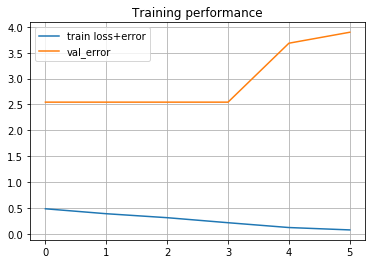

In [0]:
# Show simple version of performance                           
score2 = model2.evaluate(train_axial ,trainACL_labels,verbose=1)       
print('Train loss:',score2[0])
print('Train accuracy:',score2[1])                          
# Show loss curves                                          
plt.figure()
plt.grid()                                              
                                                            
plt.title('Training performance')                          
plt.plot(history2.epoch, history2.history['loss'], label='train loss+error')  
plt.plot(history2.epoch, history2.history['val_loss'], label='val_error')   
plt.legend()

#To save the model

In [0]:
#from keras.models import load_model

#model2.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model2  # deletes the existing model

# returns a compiled model
#identical to the previous one
#model2 = load_model('my_model.h5')

#InceptionV3 Model for Axial Abnormal

In [0]:
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(256, 256,3))  # this assumes K.image_data_format() == 'channels_last'

base_model_ax_AB = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)




In [0]:
x = base_model_ax_AB.output

x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x=Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)
#base_model.output=x
# this is the model we will train
model3 = Model(inputs=base_model_ax_AB.input,outputs=predictions)

In [0]:
for layer in model3.layers[:79]:
   layer.trainable = False
for layer in model3.layers[79:]:
   layer.trainable = True

In [0]:
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
early_stopping_monitor = EarlyStopping(patience=5)    
model3.compile(optimizer=SGD(lr=0.001,momentum=0.9), loss='binary_crossentropy',metrics=['accuracy'])
history3=model3.fit(train_axial ,trainAb_labels, validation_split=0.05,shuffle=True ,epochs=100, callbacks=[early_stopping_monitor], batch_size = 20)
#model.fit(train_axial,trainMen_labels,epochs=50,batch_size=1000,validation_split=0.05,verbose=2,callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min")])

Train on 1073 samples, validate on 57 samples
Epoch 1/100
1073/1073 [==============================] - 89s 83ms/step - loss: 0.6495 - acc: 0.6216 - val_loss: 6.2210 - val_acc: 0.6140
Epoch 2/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.5470 - acc: 0.7074 - val_loss: 6.2210 - val_acc: 0.6140
Epoch 3/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.4595 - acc: 0.7651 - val_loss: 6.2338 - val_acc: 0.5965
Epoch 4/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.3684 - acc: 0.8397 - val_loss: 6.2210 - val_acc: 0.6140
Epoch 5/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.2321 - acc: 0.9264 - val_loss: 6.2210 - val_acc: 0.6140
Epoch 6/100
1073/1073 [==============================] - 10s 9ms/step - loss: 0.1232 - acc: 0.9655 - val_loss: 6.2210 - val_acc: 0.6140


1130/1130 [==============================] - 4s 4ms/step
Train loss: 5.6744646941666055
Train accuracy: 0.647787610513974


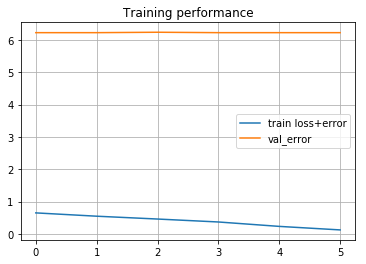

In [0]:
# Show simple version of performance                           
score3 = model3.evaluate(train_axial ,trainAb_labels,verbose=1)       
print('Train loss:',score3[0])
print('Train accuracy:',score3[1])                          
# Show loss curves                                          
plt.figure()
plt.grid()                                              
                                                            
plt.title('Training performance')                          
plt.plot(history3.epoch, history3.history['loss'], label='train loss+error')  
plt.plot(history3.epoch, history3.history['val_loss'], label='val_error')   
plt.legend()

#To save the model

In [0]:
#from keras.models import load_model

#model2.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model2  # deletes the existing model

# returns a compiled model
#identical to the previous one
#model2 = load_model('my_model.h5')

#Reading Coronal data

In [0]:
import os
import numpy as np
from matplotlib import pyplot as plt
import math


#reading coronal directery in order
coronal_dir = os.listdir("/content/data/MRNet-v1.0/train/coronal/")
coronal_dir = [f.lower() for f in coronal_dir]   # Convert to lower case
c=sorted(coronal_dir)
coronal_list=np.array(c)
coronal_reloaded=[]
print(coronal_list.shape)
for j in range(1,1131):
    file2= "/content/data/MRNet-v1.0/train/coronal/"+coronal_list[j]
    coronal_reloaded.append(np.load(file2,allow_pickle='false'))

coronal_reloaded=np.array(coronal_reloaded)

print(coronal_reloaded.shape)
train_coronal=[]
 
for j in range(len(axial_reloaded)):
   
    mid2=math.floor((coronal_reloaded[j].shape[0])/2)

    train_coronal.append([])
  
    #genereting training set for coronal    
    for n in range(mid2-1,mid2+2):
         train_coronal[j].append(coronal_reloaded[j][n])

train_coronal=np.array(train_coronal)

train_coronal=np.reshape(train_coronal,(1130,256,256,3))

print(train_coronal.shape)


(1131,)
(1130,)
(1130, 256, 256, 3)


#InceptionV3 Model for Coronal Menscuis

In [0]:
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(256, 256,3))  # this assumes K.image_data_format() == 'channels_last'

base_model_Co_Men = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)




In [0]:
x = base_model_Co_Men.output

x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x=Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)
#base_model.output=x
# this is the model we will train
model4 = Model(inputs=base_model_ax_AB.input,outputs=predictions)

In [0]:
for layer in model4.layers[:79]:
   layer.trainable = False
for layer in model4.layers[79:]:
   layer.trainable = True

In [0]:
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
early_stopping_monitor = EarlyStopping(patience=5)    
model4.compile(optimizer=SGD(lr=0.001,momentum=0.9), loss='binary_crossentropy',metrics=['accuracy'])
history4=model4.fit(train_coronal ,trainMen_labels, validation_split=0.05,shuffle=True ,epochs=100, callbacks=[early_stopping_monitor], batch_size = 20)
#model.fit(train_axial,trainMen_labels,epochs=50,batch_size=1000,validation_split=0.05,verbose=2,callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min")])

#Plotting loss of both training and validation sets per epoch.

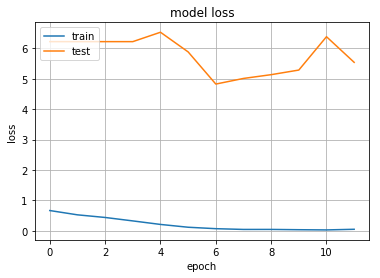

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

#Plotting Fscore of both training and validation sets per epoch.
lesa msh 3arfa a3melha

In [0]:

y_pred = model.predict(train_axial ,trainMen_labels,verbose=1)   
f_score=f1_score(trainMen_labels, y_pred, average='binary')
plt.plot(history.history['val_loss'])

# To save the model

In [0]:
#from keras.models import load_model

#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
#identical to the previous one
#model = load_model('my_model.h5')

KeyboardInterrupt: ignored